In [2]:
# Your code here

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
from numpy.random import seed, choice
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.metrics import *
from imblearn.metrics import specificity_score
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import export_text

Step 1. Reading the processed dataset


In [3]:
#Usamos el df del proyecto anterior, 

df = pd.read_csv('/workspaces/LC-Decision-Tree/data/processed/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Dividing the dataset into training and test samples

data =df

X = data.drop("Outcome", axis = 1)
y = data["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
446,0,137,84,27,0,27.3,0.231,59
6,3,78,50,32,88,31.0,0.248,26
423,1,82,64,13,95,21.2,0.415,23
596,13,104,72,0,0,31.2,0.465,38
411,1,97,70,15,0,18.2,0.147,21


In [5]:
# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

# Seleccionar las mejores características para regresión
selection_model = SelectKBest(k=6)
selection_model.fit(X_train, y_train)

# Obtener las características seleccionadas
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns[ix])

X_train_sel.head() 

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,0.0,137.0,84.0,27.3,0.231,59.0
1,3.0,78.0,50.0,31.0,0.248,26.0
2,1.0,82.0,64.0,21.2,0.415,23.0
3,13.0,104.0,72.0,31.2,0.465,38.0
4,1.0,97.0,70.0,18.2,0.147,21.0


Step 2: Initialization and training of the model



In [6]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Visualization

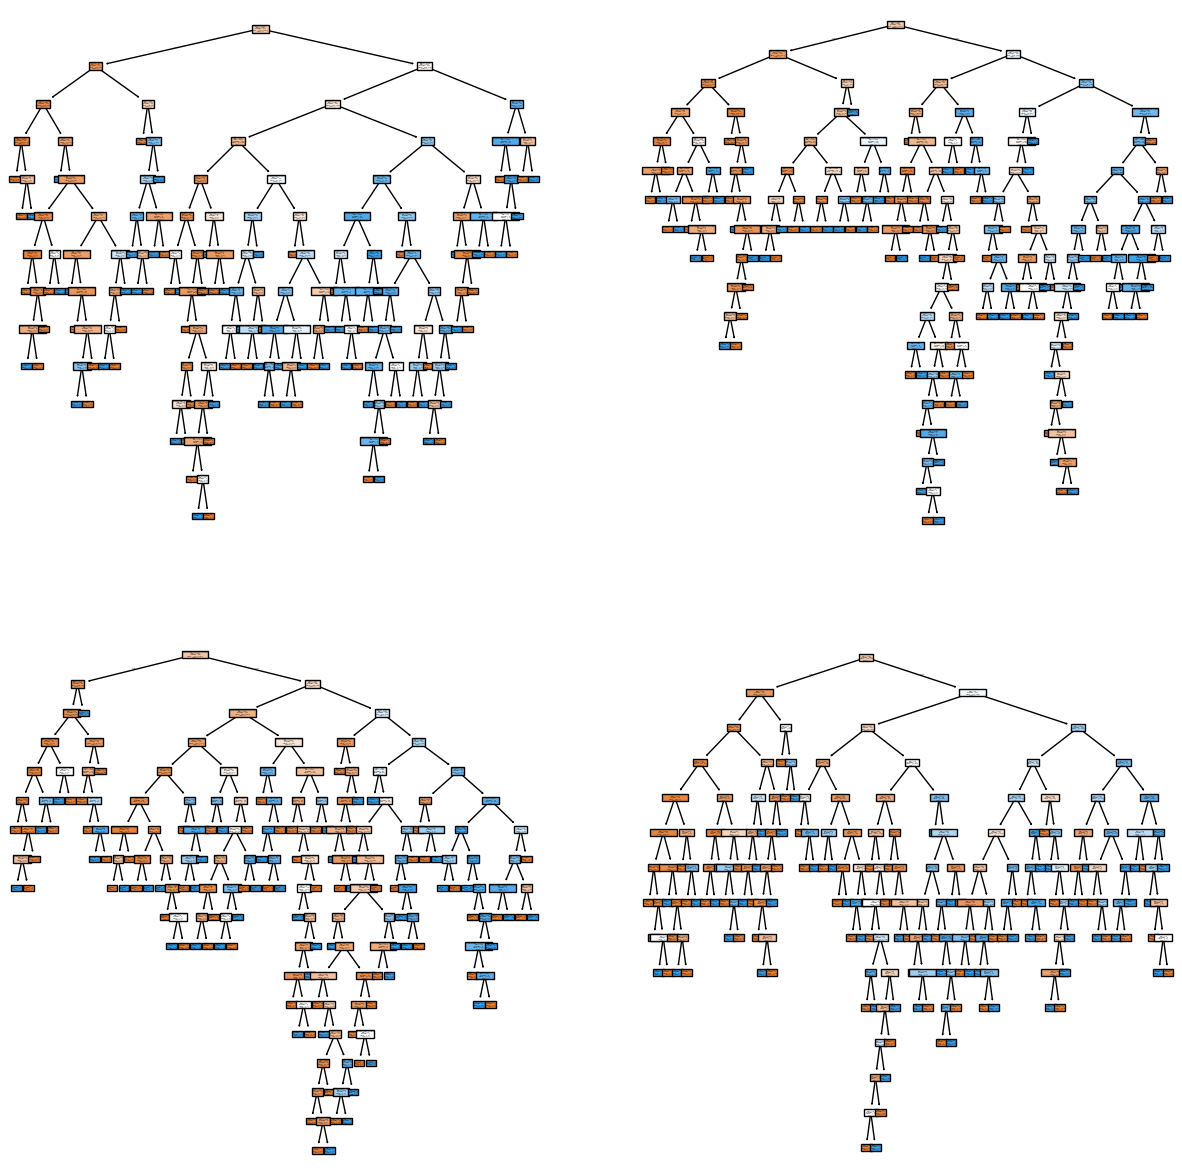

In [7]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

Step 3: Model prediction
Once the model has been trained, it can be used to predict with the test data set.

In [8]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [9]:
#Compare it with reality

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8

Optimización de hiperparámetros



In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [5, 10, 20, None]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'max_depth': 5, 'n_estimators': 50}


Análisis de impacto en la precisión  
SE prueban diferntes  valores de n_estimators y max_depth y ver cómo cambian los resultados.

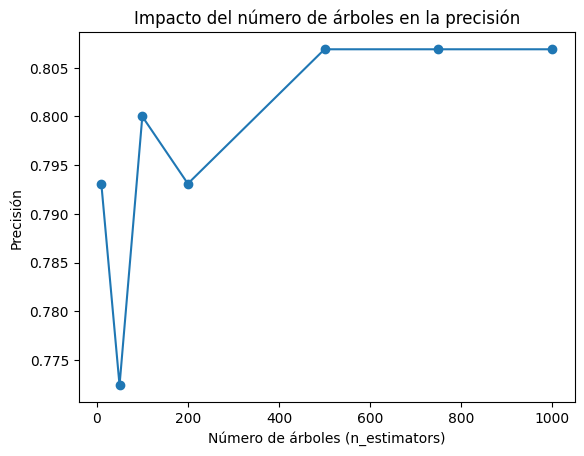

In [11]:
n_estimators_list = [10, 50, 100, 200, 500, 750, 1000]
accuracy_scores = []

for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.plot(n_estimators_list, accuracy_scores, marker='o')
plt.xlabel("Número de árboles (n_estimators)")
plt.ylabel("Precisión")
plt.title("Impacto del número de árboles en la precisión")
plt.show()

In [15]:
#Compare it with reality

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8068965517241379

los mejores hiperparámetros (max_depth=5 y n_estimators=50), como vemos al principio de la graficca si tenemos un valor bajo de (n_estimators), no es preciso y se fluctua mucho, es decir que el modelo es inestable con pocos árboles. El pinto mas òptimo es al rededor de 500.

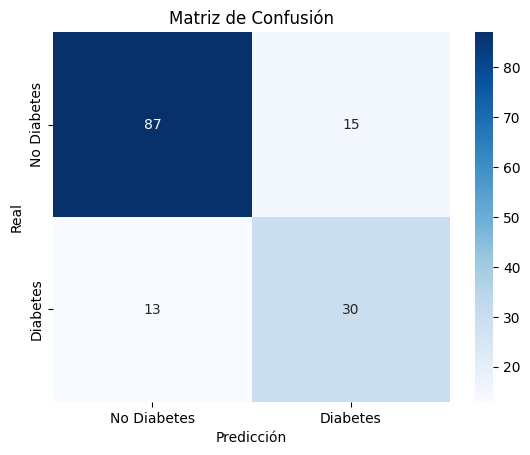

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

El modelo acierta mas casos en los que el paciente no tiene diabetes,  los casos con diabetes no diagnosticados son 13.

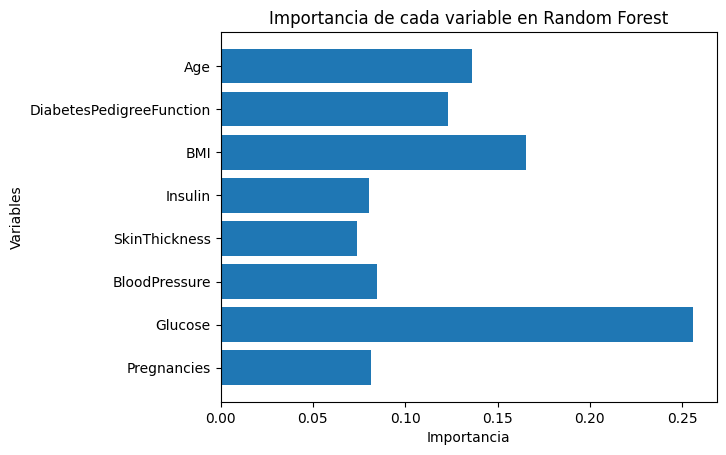

In [13]:
feature_importances = rf.feature_importances_
features = X.columns

plt.barh(features, feature_importances)
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.title("Importancia de cada variable en Random Forest")
plt.show()

In [14]:
#Guardamos el modelo
 
from pickle import dump

dump(rf, open("../models/random_forest_maxdepth5_n50_seed42.sav", "wb"))